In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter

# import some data to play with
iris = datasets.load_iris()

In [2]:
X = iris.data 
y = iris.target

In [ ]:
print X.shape, y.shape

In [6]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=121)

# ============================== KNN with k = 3 ===============================================
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
prediction = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)


The accuracy of the knn classifier for k = 3 is 91%


# find the optimal K value


The optimal number of neighbors is 11.


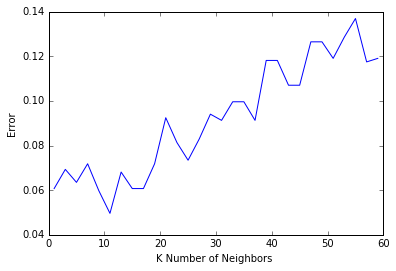

In [9]:
# creating odd list of K for KNN
k_list = list(range(0,60))
odd_neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

# perform 15-fold cross validation
for k in odd_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=15, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
error = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[error.index(min(error))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(odd_neighbors, error)
plt.xlabel('K Number of Neighbors ')
plt.ylabel('Error')
plt.show()

# KNN with K = 11

In [10]:
knn = KNeighborsClassifier(n_neighbors=11)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
prediction = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = 11 is %d%%' % acc)


The accuracy of the knn classifier for k = 11 is 100%


In [12]:
knn = KNeighborsClassifier(n_neighbors=25)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
prediction = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, prediction) * 100

print('\nThe accuracy of the knn classifier for k = 25 is %d%%' % acc)


The accuracy of the knn classifier for k = 25 is 100%


In [ ]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
# =============================================================================================
#					Part I
# =============================================================================================

# ============================== data preprocessing ===========================================
# define column names
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading training data
df = pd.read_csv('/Users/kevin/Desktop/Blog/iris.data.txt', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.ix[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# showing you two ways of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# ============================== KNN with k = 3 ===============================================
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)
# ============================== parameter tuning =============================================
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
# =============================================================================================
#					Part II
# =============================================================================================
# ===================================== writing our own KNN ===================================
def train(X_train, y_train):
	# do nothing 
	return

def predict(X_train, y_train, x_test, k):
	# create list for distances and targets
	distances = []
	targets = []

	for i in range(len(X_train)):
		# first we compute the euclidean distance
		distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
		# add it to list of distances
		distances.append([distance, i])

	# sort the list
	distances = sorted(distances)

	# make a list of the k neighbors' targets
	for i in range(k):
		index = distances[i][1]
		#print(y_train[index])
		targets.append(y_train[index])

	# return most common target
	return Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# check if k is not larger than n
	if k > len(X_train):
		raise ValueError
		
	# train on the input data
	train(X_train, y_train)

	# predict for each testing observation
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i, :], k))
# ============================== testing our KNN =============================================
# making our predictions 
predictions = []
try:
	kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
	predictions = np.asarray(predictions)

	# evaluating accuracy
	accuracy = accuracy_score(y_test, predictions) * 100
	print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
	print('Can\'t have more neighbors than training samples!!')


In [3]:
% matplotlib inline 

In [7]:
# create design matrix X and target vector y
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# ============================== KNN with k = 3 ===============================================
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)


# ============================== parameter tuning =============================================
# let's create a list of k values for our KNN 
myList = list(range(0,60))
#neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


The accuracy of the knn classifier for k = 3 is 98%


ValueError: Expected n_neighbors > 0. Got 0

In [5]:
def train(X_train, y_train):
	# do nothing 
	return

def predict(X_train, y_train, x_test, k):
	# create list for distances and targets
	distances = []
	targets = []

	for i in range(len(X_train)):
		# first we compute the euclidean distance
		distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
		# add it to list of distances
		distances.append([distance, i])

	# sort the list
	distances = sorted(distances)

	# make a list of the k neighbors' targets
	for i in range(k):
		index = distances[i][1]
		#print(y_train[index])
		targets.append(y_train[index])

	# return most common target
	return Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# check if k is not larger than n
	if k > len(X_train):
		raise ValueError
		
	# train on the input data
	train(X_train, y_train)

	# predict for each testing observation
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i, :], k))
# ============================== testing our KNN =============================================
# making our predictions 
predictions = []
try:
	kNearestNeighbor(X_train, y_train, X_test, predictions, 7)
	predictions = np.asarray(predictions)

	# evaluating accuracy
	accuracy = accuracy_score(y_test, predictions) * 100
	print('\nThe accuracy of OUR classifier is %d%%' % accuracy)

except ValueError:
	print('Can\'t have more neighbors than training samples!!')


The accuracy of OUR classifier is 98%
